# Bibliotecas

In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd


## Entendimento das Bases

## Dados Geográficos

In [48]:
mapa = gpd.read_file("bases_mapa/PE_Municipios_2023.shp")
mapa.head(2)

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,2600054,Abreu e Lima,260001,Recife,2601,Recife,26,Pernambuco,2,Nordeste,2611606,Recife/PE,126.384,"POLYGON ((-34.9148 -7.9276, -34.91576 -7.92712..."
1,2600104,Afogados da Ingazeira,260014,Afogados da Ingazeira,2603,Serra Talhada,26,Pernambuco,2,Nordeste,None,None,378.031,"POLYGON ((-37.6649 -7.83209, -37.66622 -7.8303..."


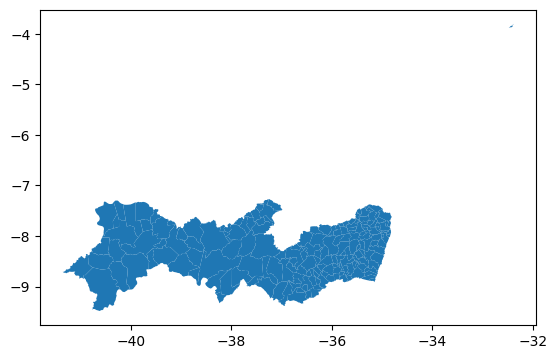

In [49]:
mapa.plot()
plt.show()

## Censo de Pernambuco

In [35]:
censo = pd.read_csv('censo.csv.gz')
censo.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
0,1100023,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
1,1100262,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
2,1101005,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
3,1101435,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
4,1101435,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN


In [36]:
ids = pd.read_csv('idmunicipio.csv.gz')
ids.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,sigla_uf,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100338,110033,434,47,44516,Nova Mamoré,0,1100106,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
1,1100205,110020,35,3,30719,Porto Velho,1,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
2,1101104,110110,493,683,46851,Itapuã do Oeste,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
3,1100809,110080,477,681,46961,Candeias do Jamari,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
4,1100940,110094,680,8,56652,Cujubim,0,1100023,11001,Vale do Jamari,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


In [37]:
# Filtrar censo para estado de Pernambuco
ids_pernambuco = ids.loc[ids['sigla_uf']=='PE']
municipios = (ids_pernambuco['id_municipio']).tolist()

censo_pe = censo.loc[censo['id_municipio'].isin(municipios)]
censo_pe.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
238,2607307,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
239,2603405,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
240,2603405,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
241,2607109,Preta,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
242,2612802,Amarela,Homens,15 a 19 anos,Alfabetizadas,NaN


In [38]:
# Deletar tabela anterior que não será mais usada
import gc
del censo
gc.collect()

23086

In [39]:
dados_censo = censo_pe.merge(ids, on='id_municipio')
dados_censo.columns

Index(['id_municipio', 'cor_raca', 'sexo', 'grupo_idade', 'alfabetizacao',
       'populacao', 'id_municipio_6', 'id_municipio_tse', 'id_municipio_rf',
       'id_municipio_bcb', 'nome', 'capital_uf', 'id_comarca',
       'id_regiao_saude', 'nome_regiao_saude', 'id_regiao_imediata',
       'nome_regiao_imediata', 'id_regiao_intermediaria',
       'nome_regiao_intermediaria', 'id_microrregiao', 'nome_microrregiao',
       'id_mesorregiao', 'nome_mesorregiao', 'id_regiao_metropolitana',
       'nome_regiao_metropolitana', 'ddd', 'id_uf', 'sigla_uf', 'nome_uf',
       'nome_regiao', 'amazonia_legal', 'centroide'],
      dtype='object')

## Resultados da Eleição em Pernambuco de 2022

In [40]:
import csv

votos = pd.read_csv('votacao.csv', quoting=csv.QUOTE_NONE, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
votos.head()

,"""DT_GERACAO""","""HH_GERACAO""","""ANO_ELEICAO""","""CD_TIPO_ELEICAO""","""NM_TIPO_ELEICAO""","""NR_TURNO""","""CD_ELEICAO""","""DS_ELEICAO""","""DT_ELEICAO""","""TP_ABRANGENCIA""",...,"""NR_SECAO""","""CD_CARGO""","""DS_CARGO""","""NR_VOTAVEL""","""NM_VOTAVEL""","""QT_VOTOS""","""NR_LOCAL_VOTACAO""","""SQ_CANDIDATO""","""NM_LOCAL_VOTACAO""","""DS_LOCAL_VOTACAO_ENDERECO"""
0,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""336""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""2""","""1457""","""170001610736""","""ESCOLA MUNICIPAL NATIVIDADE SALDANHA""","""RUA DO FUTURO, S/N"""
1,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""152""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1112""","""170001610736""","""ESCOLA DE REFERÊNCIA EM ENSINO MÉDIO PROF. AN...","""RUA QUINTINO BOCAIUVA, SN"""
2,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""25""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1066""","""170001610736""","""ESCOLA ESTADUAL JOÃO PESSOA GUERRA""","""RUA ALFREDO BANDEIRA DE MELO, S/N"""
3,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""281""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1759""","""170001610736""","""COLÉGIO TRIUNFO""","""R. DO TRIUNFO, 647"""
4,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""",...,"""96""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1171""","""170001610736""","""COLÉGIO SALESIANO""","""AV. PADRE ROCHA, 500"""


In [41]:
votos_deputado = votos.loc[votos['"DS_CARGO"']=='"DEPUTADO FEDERAL"']
print(f"No total, a base possui {len(votos)} votos, sendo {len(votos_deputado)} para Deputado Federal.")

No total, a base possui 2740379 votos, sendo 1118705 para Deputado Federal.


In [42]:
del votos
gc.collect()

0

In [43]:
to_drop = ['"ANO_ELEICAO"', '"CD_TIPO_ELEICAO"', '"NM_TIPO_ELEICAO"', '"NR_TURNO"', '"CD_ELEICAO"',
'"DS_ELEICAO"','"DT_ELEICAO"', '"TP_ABRANGENCIA"', '"SG_UF"', '"SG_UE"', '"NM_UE"',
'"CD_CARGO"', '"DS_CARGO"', '"DT_GERACAO"']

votos_deputado = votos_deputado.drop(columns=(to_drop))

votos_deputado.columns

Index(['"HH_GERACAO"', '"CD_MUNICIPIO"', '"NM_MUNICIPIO"', '"NR_ZONA"',
       '"NR_SECAO"', '"NR_VOTAVEL"', '"NM_VOTAVEL"', '"QT_VOTOS"',
       '"NR_LOCAL_VOTACAO"', '"SQ_CANDIDATO"', '"NM_LOCAL_VOTACAO"',
       '"DS_LOCAL_VOTACAO_ENDERECO"'],
      dtype='object')

In [44]:
for col in votos_deputado.columns:
    if votos_deputado[col].dtype == 'object':
        votos_deputado[col] = votos_deputado[col].str.replace('"', '', regex=False)

votos_deputado.columns = votos_deputado.columns.str.replace('"', '', regex=False)

votos_deputado['QT_VOTOS'] = votos_deputado['QT_VOTOS'].astype(int)

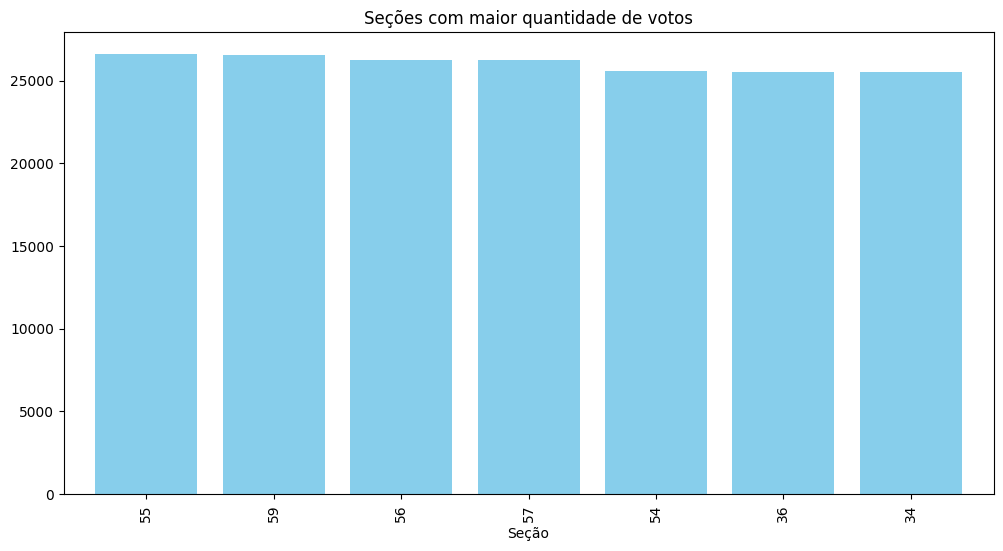

In [45]:
votos_secao = votos_deputado.groupby('NR_SECAO')['QT_VOTOS'].sum().sort_values(ascending=False)
maisvotos = votos_secao.head(7)
plt.figure(figsize=(12,6))
maisvotos.plot(kind='bar', width=0.8, color='skyblue')
plt.title("Seções com maior quantidade de votos")
plt.xlabel("Seção")
plt.show()

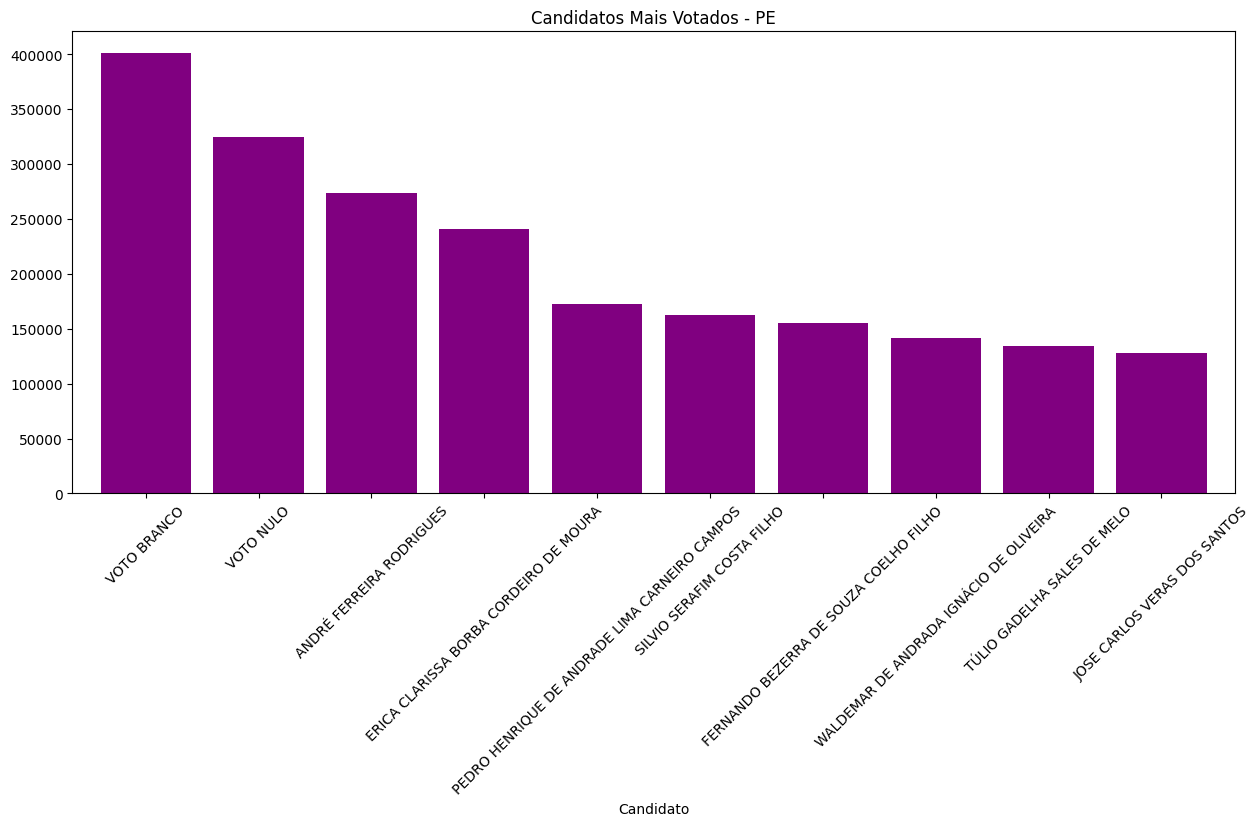

In [46]:
votos_candidatos = votos_deputado.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending=False)
candidatos_mais_votados = votos_candidatos.head(10)

plt.figure(figsize=(15,6))
candidatos_mais_votados.plot(kind='bar', width=0.8, color='purple')
plt.title('Candidatos Mais Votados - PE')
plt.xlabel("Candidatos para Deputado Federal")
plt.xticks(rotation=45)
plt.show()